# Описание проблемы

У нас есть набор данных с Kaggle [disease prediction](https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning), содержащий информацию о пациентах с различными заболеваниями. Наша задача заключается в том, чтобы обучить модель, которая могла бы предсказывать, имеет ли пациент определенное заболевание, на основе его медицинской истории(анкеты/симптомов). Это может помочь врачам в принятии решений и раннем выявлении заболеваний, что может улучшить качество жизни пациентов.

Для обучения модели мы использовали набор данных, который был загружен из файла "Training.csv". Этот файл содержит информацию о пациентах, симптомы, наличие определенных медицинских проблем и т.д. Каждая строка в файле представляет собой отдельного пациента с определенной болезнью, а столбец "прогноз" указывает, какая именно у пациента болезнь.

Для тестирования эффективности модели в первом случае мы делили наш тренировочный файл 70/30, во втором случае мы использовали отдельный набор данных, загруженный из файла "Testing.csv". Эти данные были использованы для проверки того, насколько хорошо наша модель способна предсказывать наличие заболевания у пациентов.

## Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np

import graphviz  # Библиотека для создания графических визуализаций
import seaborn as sns  # Библиотека для визуализации и исследования статистических данных
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz  # Библиотека для экспорта моделей деревьев решений в графический формат
from sklearn.tree import DecisionTreeClassifier  # Классификатор дерева решений из библиотеки scikit-learn

from sklearn.metrics import classification_report,accuracy_score  # Метрики классификации, включая точность, полноту и F1-меру
from sklearn.metrics import mean_absolute_error  # Метрика средней абсолютной ошибки для регрессионных моделей

from sklearn.model_selection import train_test_split  # Библиотека для разделения данных на обучающую и тестовую выборки

## Подключаем гугл диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загружаем данные для обучения модели:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_cert/Training.csv")
df.describe()

,зуд,сыпь_на_коже,узловые_высыпания_на_коже,постоянные_чихания,дрожь,озноб,боль_в_суставах,боль_в_животе,кислотность,язвы_на_языке,...,гнойные_прыщи,угри,снующий,шелушение_кожи,седина_как_пыль,небольшие_вмятины_на_ногтях,воспалительные_ногти,волдырь,красная_язва_вокруг_носа,желтая_корочка
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(4920, 133)

In [ ]:
df.columns

Index(['зуд', 'сыпь_на_коже', 'узловые_высыпания_на_коже',
       'постоянные_чихания', 'дрожь', 'озноб', 'боль_в_суставах',
       'боль_в_животе', 'кислотность', 'язвы_на_языке',
       ...
       'угри', 'снующий', 'шелушение_кожи', 'седина_как_пыль',
       'небольшие_вмятины_на_ногтях', 'воспалительные_ногти', 'волдырь',
       'красная_язва_вокруг_носа', 'желтая_корочка', 'прогноз'],
      dtype='object', length=133)

## Выведем список заболеваний

In [ ]:
df['прогноз'].value_counts()

Грибковая инфекция                                       120
Гепатит С                                                120
Гепатит Е                                                120
Алкогольный гипатит                                      120
Туберкулез                                               120
Простуда                                                 120
Пневмония                                                120
Диморфный геморрой (сваи)                                120
Острое сердечно-сосудистое заболевание                   120
Варикозное расширение вен                                120
Гипотиреоз                                               120
Гипертиреоз                                              120
Гипогликемия                                             120
Остеоартроз                                              120
Артрит                                                   120
(головокружение) Пароймсал Позиционное головокружение    120
Акне                    

# Разделяем данные на признаки (x) и метки (y)

Делим данные на обучающую и тестовую выборки в соотношении 70/30

In [ ]:
x = df.drop('прогноз', axis = 1)
y = df['прогноз']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

# Создаем модель дерева решений и обучаем ее на обучающей выборке

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

# Предсказываем метки классов на тестовой выборке и вычисляем точность

In [ ]:
pred = tree.predict(x_test)
acc = tree.score(x_test, y_test)

print("Точность: {:.2f}%".format(acc*100))

Точность: 100.00%


# Построим график дерева решений

График получается огромным, поэтому просто для наглядности установим глубину дерева равным 3 (max_depth=3)

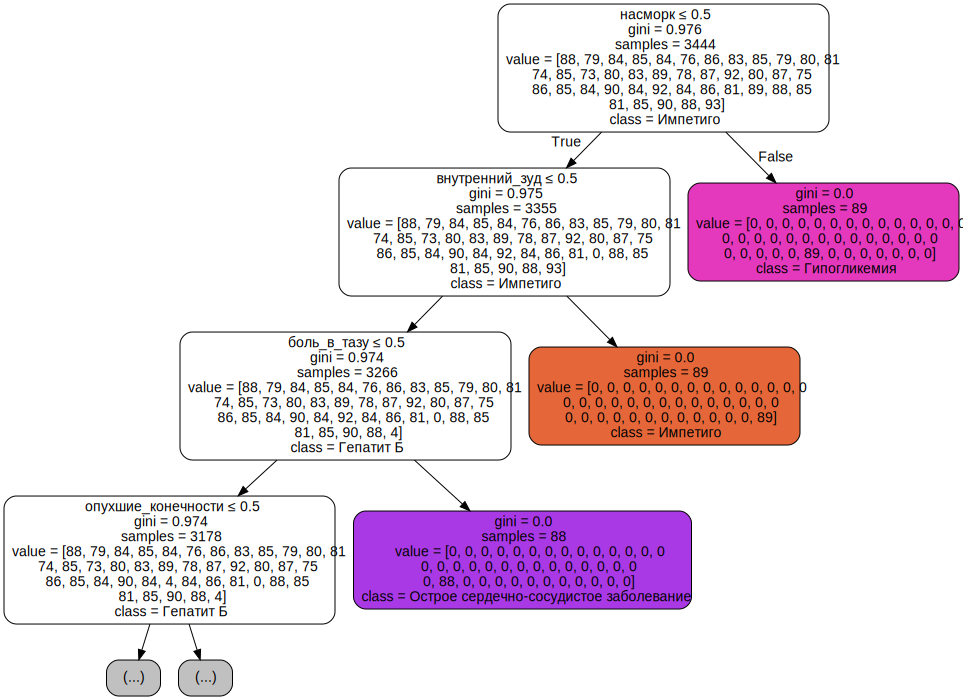

In [ ]:
# Создаем файл формата DOT, чтобы построить график дерева решений
dot_data = export_graphviz(tree, out_file=None, 
                           max_depth=3,
                           feature_names=x_train.columns,  
                           class_names=['Грибковая инфекция',
                                        'Аллергия',
                                        'Гастроэзофагеальная рефлюксная болезнь',
                                        'Хронический холестаз',
                                        'Реакция на наркотики',
                                        'Язвенная болезнь',
                                        'СПИД',
                                        'Диабет',
                                        'Гастроэнтерит',
                                        'Бронхиальная астма',
                                        'Гипертония',
                                        'Мигрень',
                                        'Шейный спондилез',
                                        'Паралич (кровоизлияние в мозг)',
                                        'Желтуха',
                                        'Малярия',
                                        'Ветряная оспа',
                                        'Денге',
                                        'Брюшной тиф',
                                        'гепатит А',
                                        'Гепатит Б',
                                        'Гепатит С',
                                        'Гепатит Д',
                                        'Гепатит Е',
                                        'Алкогольный гепатит',
                                        'Туберкулез',
                                        'Простуда',
                                        'Пневмония',
                                        'Диморфный геморрой (сваи)',
                                        'Острое сердечно-сосудистое заболевание',
                                        'Варикозное расширение вен',
                                        'Гипотиреоз',
                                        'Гипертиреоз',
                                        'Гипогликемия',
                                        'Остеоартроз',
                                        'Артрит',
                                        '(головокружение) Пароймсал Позиционное головокружение',
                                        'Акне',
                                        'Инфекция мочевыводящих путей',
                                        'Псориаз',
                                        'Импетиго',
                                        'Грибковая инфекция'],
                           filled=True, rounded=True,  
                           special_characters=True)

# Визуализируем график
graphviz.Source(dot_data)

### Анализ первого блока дерева:

1. "Насморк ≤ 0.5" - это условие разделения ветви на две группы: одна группа будет содержать примеры, где значение признака "насморк" меньше или равно 0.5, а другая - примеры, где значение больше 0.5.

2. "gini = 0.976" - это показатель неопределенности для данного узла. Он оценивает, насколько чисто распределены примеры в каждой из двух групп, сформированных по условию разделения. Чем меньше этот показатель, тем более однородна группа примеров.

3. "samples = 3444" - это количество примеров, попавших в данный узел.

4. "value = [88, 79, 84, 85, 84, 76, 86, 83, 85, 79, 80, 81 74, 85, 73, 80, 83, 89, 78, 87, 92, 80, 87, 75 86, 85, 84, 90, 84, 92, 84, 86, 81, 89, 88, 85 81, 85, 90, 88, 93]" - это количество примеров каждого класса, попавших в данный узел. Здесь представлены 38 разных классов и количество примеров каждого из них. В данном случае, данный узел содержит примеры только одного класса, который указан далее.

5. "class = Импетиго" - это название класса(заболевания), к которому относятся все примеры, находящиеся в данном узле дерева.

# Оцениваем важность признаков в модели. Cтроим график

Оценка важности признаков в модели дерева решений основана на том, как сильно каждый признак влияет на разделение данных на различные категории.

Когда дерево решений строится, каждый узел дерева выбирает признак, который лучше всего разделяет данные. Измеряется степень этого разделения с помощью различных метрик, таких как индекс gini или энтропия.

Оценка важности признака основана на том, как много раз признак был выбран для разделения данных, и насколько это разделение улучшило качество модели. Если признак часто использовался для разделения данных и улучшил качество модели, то его важность будет выше.

In [ ]:
fi = pd.DataFrame(tree.feature_importances_*100, x_test.columns, columns=['Важность'])
fi.sort_values(by='Важность',ascending=False, inplace=True)
fi

,Важность
пожелтение_глаз,4.715413
насморк,2.645294
внутренний_зуд,2.638602
боль_в_тазу,2.609205
опухшие_конечности,2.586532
...,...
опухшие_ноги,0.000000
ожирение,0.000000
судороги,0.000000
головокружение,0.000000


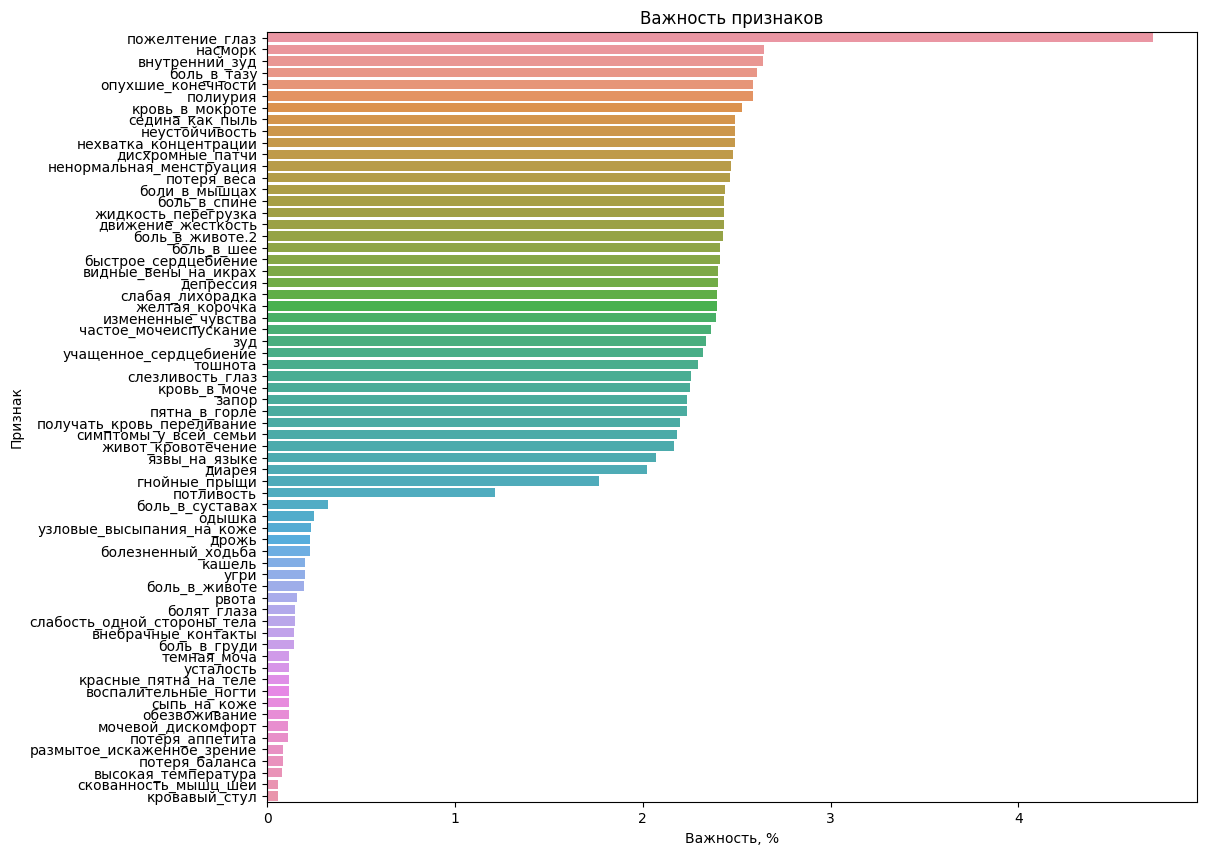

In [ ]:
# Строим график
plt.figure(figsize=(12,10))
sns.barplot(x=fi[fi['Важность'] > 0]['Важность'], y=fi[fi['Важность'] > 0].index)
plt.title('Важность признаков')
plt.xlabel('Важность, %')
plt.ylabel('Признак')
plt.show()

# Удаляем признаки с низкой важностью и обучаем модель на новых данных

In [ ]:
zeros = np.array(fi[fi['Важность'] <= 2.300000].index)
training_new = df.drop(columns=zeros, axis=1)
training_new.shape[1]
training_new.columns

Index(['зуд', 'потеря_веса', 'боль_в_спине', 'слабая_лихорадка',
       'пожелтение_глаз', 'насморк', 'быстрое_сердцебиение', 'боль_в_шее',
       'опухшие_конечности', 'боль_в_тазу', 'движение_жесткость',
       'неустойчивость', 'частое_мочеиспускание', 'внутренний_зуд',
       'депрессия', 'боли_в_мышцах', 'измененные_чувства', 'боль_в_животе.2',
       'ненормальная_менструация', 'дисхромные_патчи', 'полиурия',
       'нехватка_концентрации', 'жидкость_перегрузка', 'кровь_в_мокроте',
       'видные_вены_на_икрах', 'учащенное_сердцебиение', 'седина_как_пыль',
       'желтая_корочка', 'прогноз'],
      dtype='object')

# Функция для обучения модели на новых данных

In [ ]:
def modelling(df1):
    x_new = df1.drop('прогноз', axis = 1)
    y_new = df1['прогноз']
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.3, random_state=42) 
    tree.fit(x_train_new, y_train_new)
    
    pred_new = tree.predict(x_test_new)
    
    acc_new = tree.score(x_test_new, y_test_new)
    print("Точность: {:.2f}%".format(acc*100))

# Загружаем данные для тестирования модели

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_cert/Testing.csv")
test_new = test.drop(columns=zeros, axis=1)
test_new.shape[1]

29

Тестируем

In [ ]:
modelling(test_new)

Точность: 100.00%


# Моделирование предсказания

Для начала из тестовой выборки возьмем строчку без предсказания, и подадим в нашу модель

In [ ]:
df_tmp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_cert/Testing.csv")

Удаляем прогноз

In [ ]:
s = df_tmp.drop('прогноз', axis=1)

Выбираем больного из первой строчки


Программе неизвестно, что у больного Грибковая инфекция

In [ ]:
symptoms = s.iloc[[0]]

In [ ]:
symptoms

,зуд,сыпь_на_коже,узловые_высыпания_на_коже,постоянные_чихания,дрожь,озноб,боль_в_суставах,боль_в_животе,кислотность,язвы_на_языке,...,гнойные_прыщи,угри,снующий,шелушение_кожи,седина_как_пыль,небольшие_вмятины_на_ногтях,воспалительные_ногти,волдырь,красная_язва_вокруг_носа,желтая_корочка
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Загрузка и подготовка данных
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_cert/Training.csv")
x = df.drop('прогноз', axis=1)
y = df['прогноз']

# Обучение модели на всем наборе данных
tree = DecisionTreeClassifier()
tree.fit(x, y)

# Функция для предсказания болезни на основе симптомов, введенных пользователем
def predict_disease(symptoms):
    # Создание датафрейма из списка симптомов, если захотим подавать симптомы списком
    # symptoms_df = pd.DataFrame(symptoms, index=x.columns).T
    
    # Предсказание болезни
    disease = tree.predict(symptoms)
    
    return disease[0]

# Пример использования функции
disease_prediction = predict_disease(symptoms)
print("Прогнозируемая болезнь:", disease_prediction)

Прогнозируемая болезнь: Грибковая инфекция


Прогноз верный

# Пути предсказания болезни, по входным данным истории/анкеты больного

Попробуем сгенерировать случайного больного с неизвестной болезнью и предсказать её

In [ ]:
import random

symptom_rand = [random.randint(0, 1) for _ in range(132)]

In [ ]:
# Функция для предсказания болезни на основе симптомов, введенных пользователем
def predict_disease(symptoms):
    # Создание датафрейма из списка симптомов
    symptoms_df = pd.DataFrame(symptoms, index=x.columns).T
    
    # Предсказание болезни
    disease = tree.predict(symptoms_df)
    
    return disease[0]

# Пример использования функции
disease_prediction = predict_disease(symptom_rand)
print("Прогнозируемая болезнь:", disease_prediction)

Прогнозируемая болезнь: Денге


Вероятно нашему случайному больному попался опасный комар.


Денге («костоломная лихорадка») — вирусная инфекция, которая передается людям от комаров. Она чаще встречается в районах с тропическим и субтропическим климатом.

# Совершенствование модели

Данный датасет можно дополнять новыми историями болезней, дообучивать эту модель. В идеале с помощью НЛП можно подготовить часть данных с медицинских справочников.

# Возможности развертывания проекта (бот, веб-сервис, что-то иное)

**В качестве варианта развертывания данного проекта можно использовать веб-сервис.**

Например, можно создать API, которое будет принимать запросы на предсказание на основе обученной модели. Для этого можно использовать фреймворки, такие как Flask или Django, чтобы создать RESTful API, которое будет принимать запросы в формате JSON и возвращать ответ в таком же формате. Это позволит интегрировать модель в другие приложения или сервисы. Также можно использовать контейнеризацию с помощью Docker, чтобы легко развернуть приложение на разных серверах или в облаке.


**Также возможно упаковать данный проект в телеграм-бот:**

1 Необходимо будет убрать реализацию графиков;

2 Создать функцию для запросов симптомов или в качестве опроса, или дополнительно обучить сеть НЛП, чтобы пользователь сам перечислил своими словами симптомы и самочувствие через запятую, программа в свою очередь будет классифицировать данные признаки на наши 133 симптома;

3 Нужно будет создать файл зависимостей;

4 Упаковать в докер;

5 Распаковать в VDS сервере, например как ruVDS.


# Чтобы упаковать наш код в Docker-контейнер, нужно выполнить следующие шаги:

Создаем файл с именем Dockerfile (без расширения) в корневом каталоге проекта.

Открываем файл Dockerfile и добавляем следующий код:

In [ ]:
FROM python:3.9

WORKDIR /app

COPY requirements.txt .

RUN pip install --no-cache-dir -r requirements.txt

COPY . .

CMD ["python", "main.py"]

# Здесь:

FROM python:3.9 указывает, что наш контейнер будет основан на образе Python версии 3.9.

WORKDIR /app создает каталог /app внутри контейнера и устанавливает его текущим рабочим каталогом.

COPY requirements.txt . копирует файл requirements.txt из локальной директории проекта внутрь контейнера.

RUN pip install --no-cache-dir -r requirements.txt выполняет установку необходимых зависимостей из файла requirements.txt внутри контейнера.

COPY . . копирует все файлы и каталоги проекта внутрь контейнера.

CMD ["python", "main.py"] указывает команду, которая будет запускаться при старте контейнера. В данном случае, мы запускаем скрипт Python с именем "main.py".

# Создаем файл с именем requirements.txt в корневом каталоге проекта и добавляем туда следующее содержимое:

In [ ]:
pandas
numpy
scikit-learn
seaborn
matplotlib

Здесь мы перечисляем все библиотеки Python, которые использует наш скрипт.

# Далее:

Запустим команду docker build -t my-image . для создания образа Docker. Здесь my-image - это имя образа, которое мы можем задать произвольно. Точка в конце команды указывает на текущую директорию.

После успешного создания образа можно запустить контейнер с помощью команды docker run my-image. В этой команде необходимо указать дополнительные параметры, такие как порты и т.д., если они нужны.

Проверим работу контейнера, запустив наш скрипт командой python3 main.py.